# 幸福度は何によって決まるのか  
## ― 経済要因と社会的要因の比較分析 ―

氏名：塩谷翼
学籍番号：1254810398

---

## 1. 研究背景とテーマ

幸福度はGDPなどの経済指標によって説明されることが多い。
しかし、経済的に豊かな国であっても、
必ずしも幸福度が高いとは限らない。

本研究では World Happiness Report のデータを用い、
経済要因と社会的要因のどちらが
幸福度に強く関係しているのかを分析する。


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("world_happiness_report.csv")
df.head()


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


## 2. データの概要

本データセットには、各国の幸福度スコアと、
GDP、家族的支援、健康、自由度、
政府への信頼、寛容さといった指標が含まれている。


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual              315 non-null    f

## 3. 分析①：GDPと幸福度の関係


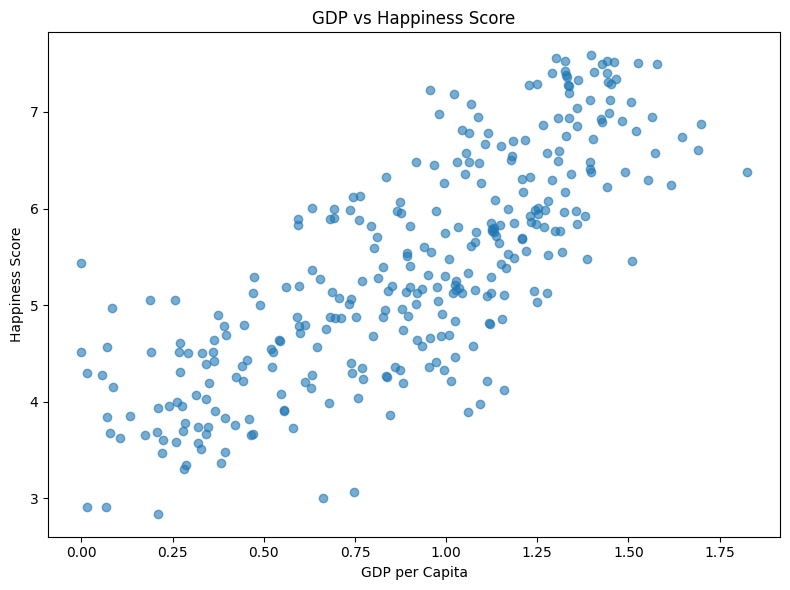

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["Economy (GDP per Capita)"],
    df["Happiness Score"],
    alpha=0.6
)

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP vs Happiness Score")
plt.tight_layout()
plt.show()


In [34]:
df[["Economy (GDP per Capita)", "Happiness Score"]].corr()


,Economy (GDP per Capita),Happiness Score
Economy (GDP per Capita),1.000000,0.779171
Happiness Score,0.779171,1.000000


GDPと幸福度には正の相関が見られるが、
完全な比例関係ではない。

この結果から、経済成長のみでは
幸福度を十分に説明できない可能性が示唆される。


## 4. 分析②：幸福度上位国と下位国の比較


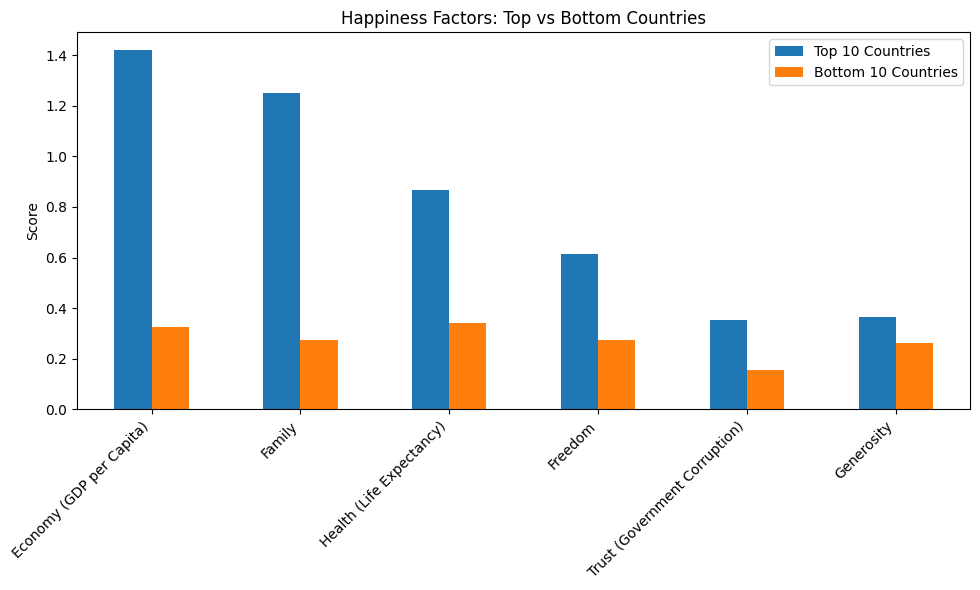

In [35]:
top10 = df.sort_values("Happiness Score", ascending=False).head(10)
bottom10 = df.sort_values("Happiness Score").head(10)

factors = [
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)",
    "Generosity"
]

top_avg = top10[factors].mean()
bottom_avg = bottom10[factors].mean()

compare_df = pd.DataFrame({
    "Top 10 Countries": top_avg,
    "Bottom 10 Countries": bottom_avg
})

compare_df.plot(kind="bar", figsize=(10,6))
plt.title("Happiness Factors: Top vs Bottom Countries")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


幸福度上位国は、GDPだけでなく、
家族的支援、健康、自由度といった
社会的要因も高い水準にある。

一方、下位国ではこれらの要因が全体的に低く、
幸福度は複合的要因によって左右されていると考えられる。


## 5. 分析③：日本と世界平均の比較


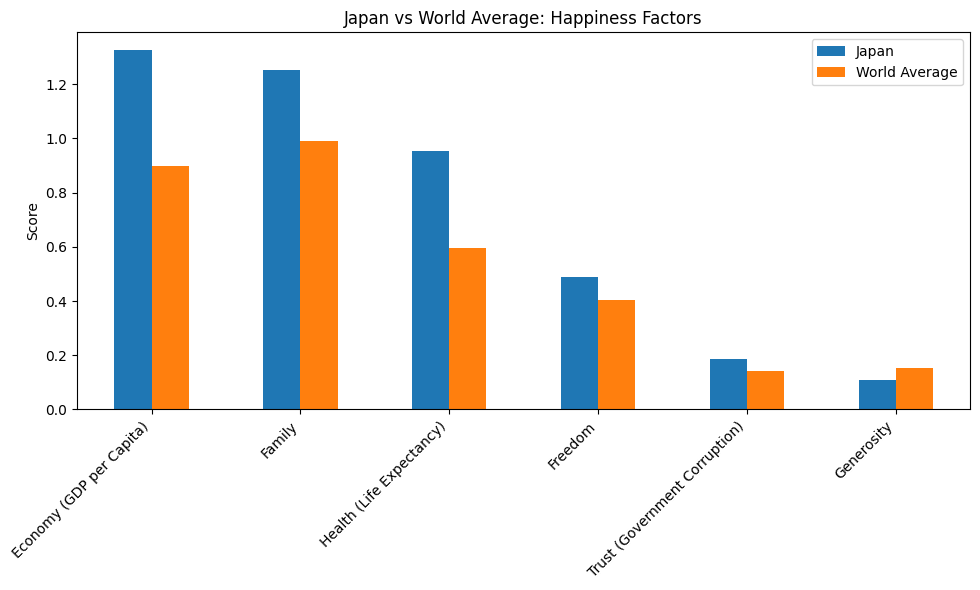

In [36]:
japan = df[df["Country"] == "Japan"].mean(numeric_only=True)
world_avg = df.mean(numeric_only=True)

comparison = pd.DataFrame({
    "Japan": japan[factors],
    "World Average": world_avg[factors]
})

comparison.plot(kind="bar", figsize=(10,6))
plt.title("Japan vs World Average: Happiness Factors")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


日本はGDPや健康指標では世界平均を上回っている一方で、
家族的支援、政府への信頼、寛容さといった
社会的要因では平均を下回っている。

この結果から、日本の幸福度は
経済的豊かさ以外の要因によって
制約されている可能性が示唆される。


## 6. 分析④：幸福度と各要因の相関分析


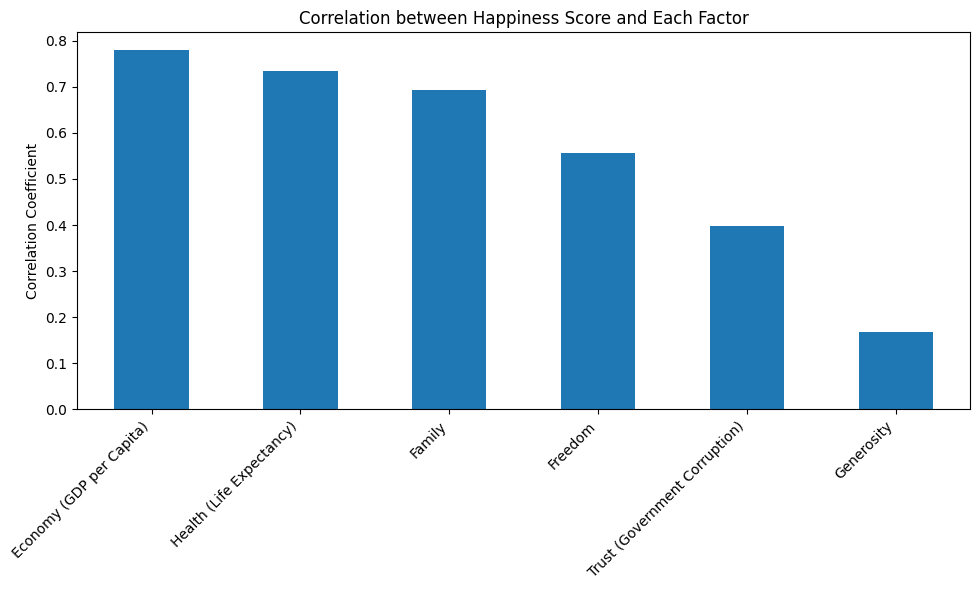

In [37]:
correlations = (
    df[factors + ["Happiness Score"]]
    .corr()["Happiness Score"]
    .drop("Happiness Score")
)

plt.figure(figsize=(10,6))
correlations.sort_values(ascending=False).plot(kind="bar")

plt.title("Correlation between Happiness Score and Each Factor")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


相関分析の結果、GDPに加えて、
家族的支援や健康指標が
幸福度と強い相関を持つことが確認された。

幸福度は単一の経済要因ではなく、
複数の社会的要因によって
形成されていることが分かる。


## 7. 結論

本研究では、世界幸福度データを用いて
幸福度と各要因の関係を分析した。

その結果、GDPは重要な要因であるものの、
それだけでは幸福度を十分に説明できず、
社会的支援や健康、自由度といった
非経済的要因が大きな役割を果たしていることが明らかとなった。

今後の幸福度向上には、
経済成長に加えて、
人間関係や社会的安心感を重視した
取り組みが重要であると考えられる。
